<a href="https://colab.research.google.com/github/MarkusNeusinger/defichain-data-toolkit/blob/main/notebooks/daily_dfi_burn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Daily DFI Burn, 7 day moving avg

In [1]:
import os, sys
import matplotlib.pyplot as plt

# import defichain-data-toolkit utils
if os.path.isdir('defichain-data-toolkit'): os.system('rm -rf defichain-data-toolkit')
!git clone https://github.com/MarkusNeusinger/defichain-data-toolkit.git
sys.path.insert(1, 'defichain-data-toolkit')

from utils import fetch_history

Cloning into 'defichain-data-toolkit'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 30 (delta 8), reused 22 (delta 7), pack-reused 0
Receiving objects: 100% (30/30), 270.76 KiB | 1.40 MiB/s, done.
Resolving deltas: 100% (8/8), done.


In [2]:
df = fetch_history('daily', ['Height', 'EmissionTotal', 'BurnedTotal'], from_timestamp='2023-06-01')
df.sort_values('datetime_utc', ascending=True, inplace=True)
df.head()

100%|██████████| 3/3 [00:00<00:00, 10.01it/s]


,datetime_utc,emissiontotal,height,burnedtotal
0,2023-06-01,141.272362,2.982155e+06,3.176424e+08
1,2023-06-02,141.016392,2.985067e+06,3.176433e+08
2,2023-06-03,138.930066,2.987942e+06,3.176434e+08
3,2023-06-04,138.930066,2.990796e+06,3.176434e+08
4,2023-06-05,138.930066,2.993661e+06,3.176435e+08


In [3]:
# calculate 1day diff
df['time_diff'] = df['datetime_utc'].diff().dt.total_seconds()
df['height_diff'] = df['height'].diff()
df['burn_diff'] = df['burnedtotal'].diff()

# drop rows with diff > 1day or nan
df = df[df['time_diff'] == 86400].copy()
df['emission'] = df['emissiontotal'] * df['height_diff']
df['burn'] = df['burn_diff']

# calculate 7 day moving avg of burn
df['burn_7day_avg'] = df['burn'].rolling(window=7).mean()

df.head()

,datetime_utc,emissiontotal,height,burnedtotal,time_diff,height_diff,burn_diff,emission,burn,burn_7day_avg
1,2023-06-02,141.016392,2.985067e+06,3.176433e+08,86400.0,2912.697368,958.156355,410738.074966,958.156355,NaN
2,2023-06-03,138.930066,2.987942e+06,3.176434e+08,86400.0,2874.517996,53.233346,399356.975147,53.233346,NaN
3,2023-06-04,138.930066,2.990796e+06,3.176434e+08,86400.0,2854.178490,40.038776,396531.206243,40.038776,NaN
4,2023-06-05,138.930066,2.993661e+06,3.176435e+08,86400.0,2864.791911,21.552386,398005.729578,21.552386,NaN
5,2023-06-06,138.930066,2.996486e+06,3.176435e+08,86400.0,2825.049285,88.088401,392484.283796,88.088401,NaN


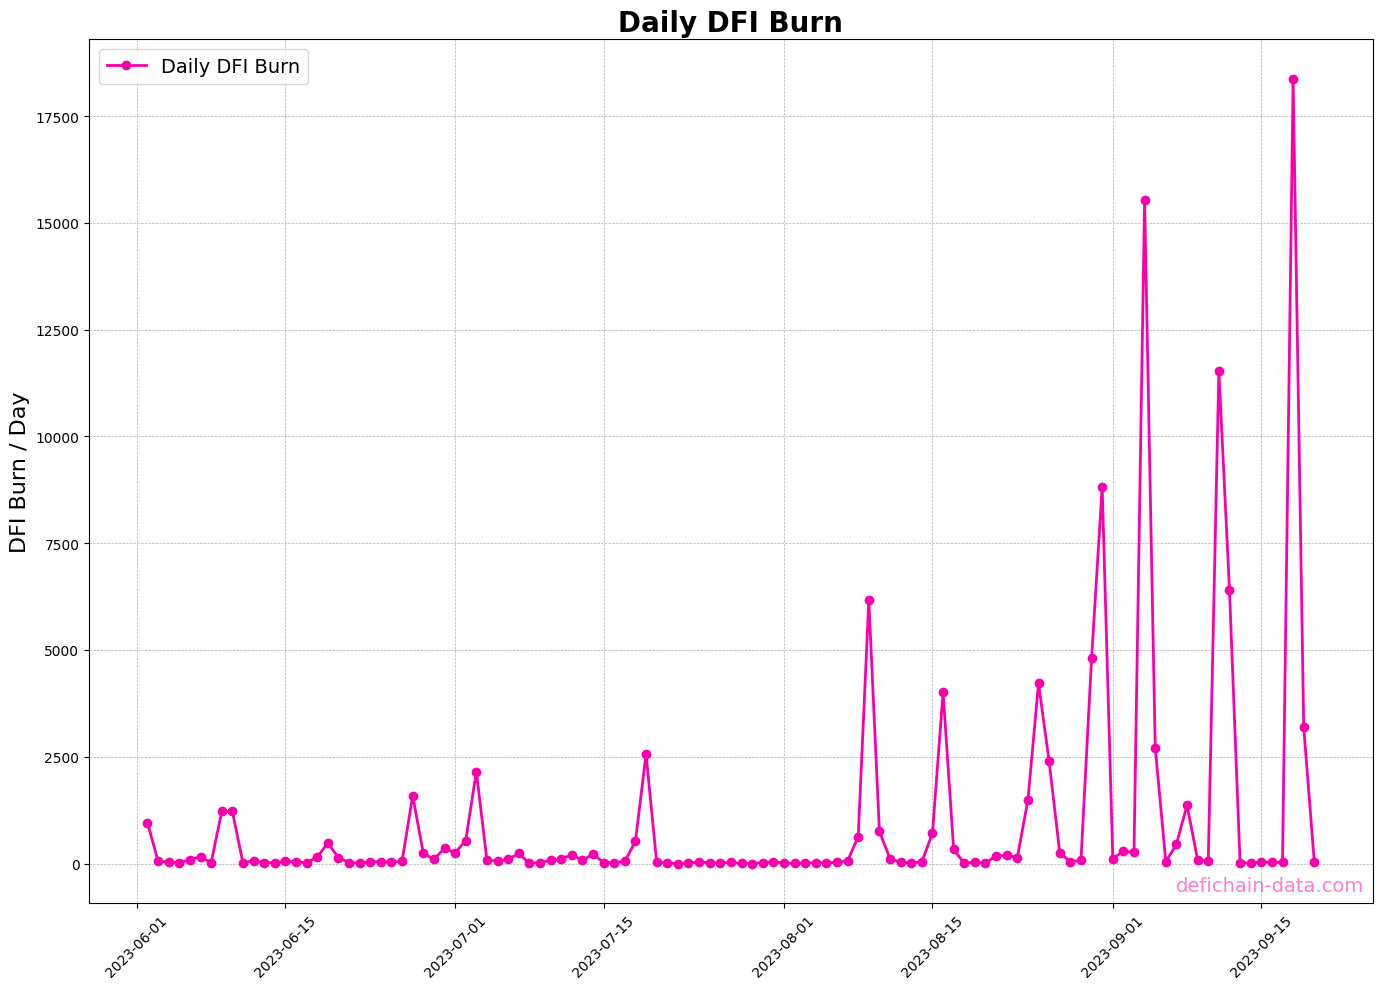

In [6]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(14, 10))

# Plot the burn data
axs.plot(df['datetime_utc'], df['burn'], marker='o', linestyle='-', linewidth=2,
         markersize=6, color='#F800AB', label='Daily DFI Burn')

# Add title and labels
axs.set_title('Daily DFI Burn', fontsize=20, fontweight='bold')
axs.set_xlabel(None, fontsize=16)
axs.set_ylabel('DFI Burn / Day', fontsize=16)

# Customize grid and ticks
axs.grid(which='both', linestyle='--', linewidth=0.5)

# Add legend
axs.legend(fontsize=14)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Add watermark
axs.text(0.92, 0.02, 'defichain-data.com', ha='center', va='center', transform=axs.transAxes,
         fontsize=14, color='#F800AB', alpha=0.5)

# Show the plot
plt.tight_layout()
plt.savefig('Daily_DFI_Burn.png', dpi=300)
plt.show()


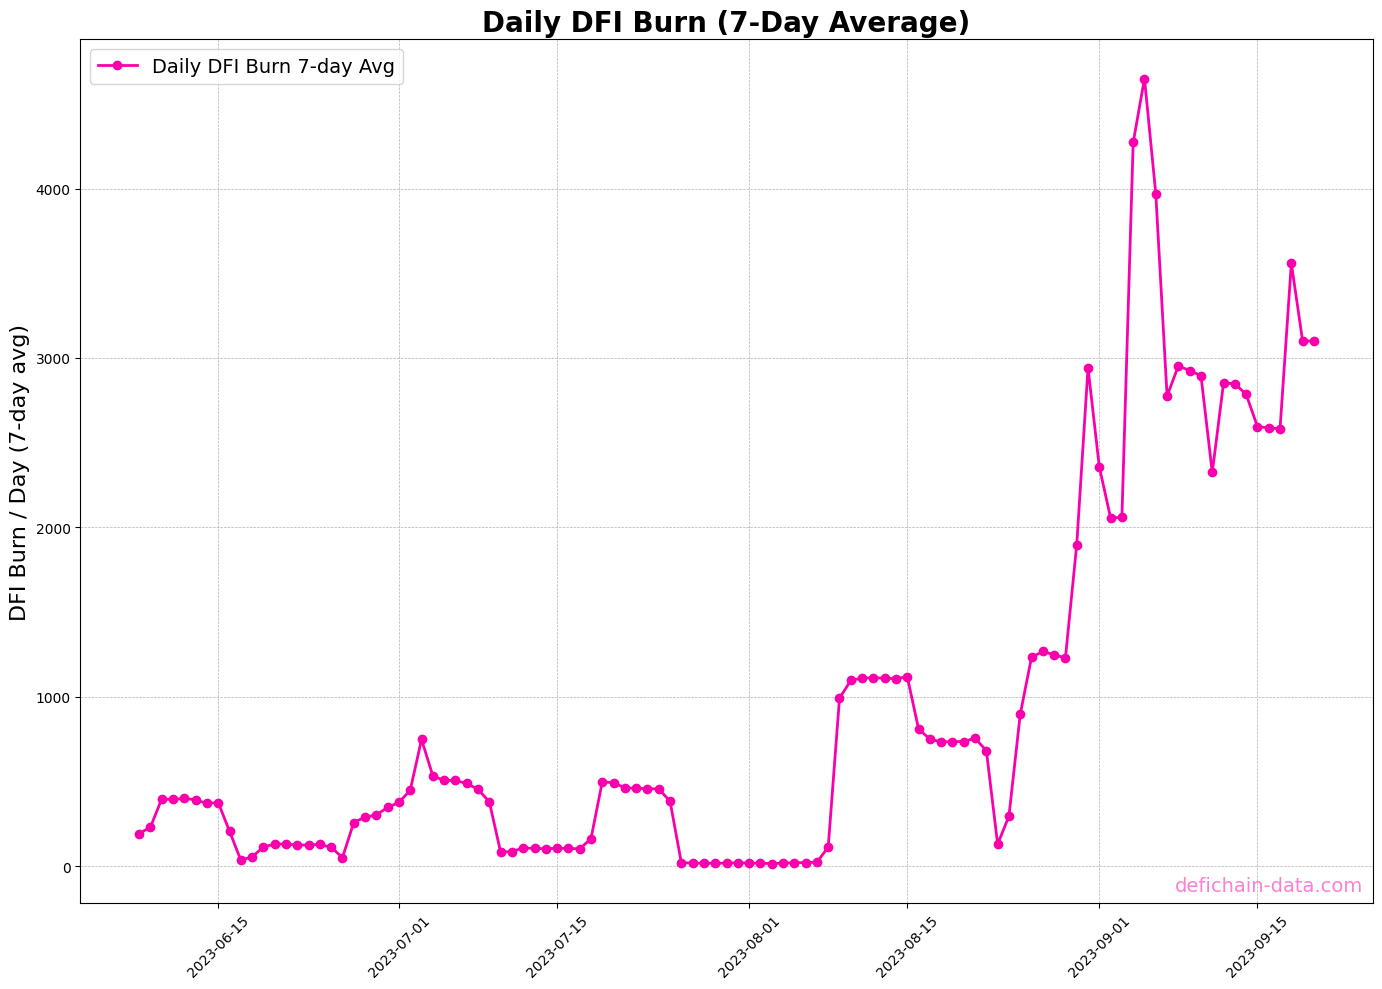

In [5]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(14, 10))

# Plot the 7-day average burn
axs.plot(df['datetime_utc'], df['burn_7day_avg'], marker='o', linestyle='-', linewidth=2,
         markersize=6, color='#F800AB', label='Daily DFI Burn 7-Day Avg')

# Add title and labels
axs.set_title('Daily DFI Burn (7-Day Average)', fontsize=20, fontweight='bold')
axs.set_xlabel(None, fontsize=16)
axs.set_ylabel('DFI Burn / Day (7-Day Avg)', fontsize=16)

# Customize grid and ticks
axs.grid(which='both', linestyle='--', linewidth=0.5)

# Add legend
axs.legend(fontsize=14)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Add watermark
axs.text(0.92, 0.02, 'defichain-data.com', ha='center', va='center', transform=axs.transAxes,
         fontsize=14, color='#F800AB', alpha=0.5)

# Show the plot
plt.tight_layout()
plt.savefig('Daily_DFI_Burn.png', dpi=300)
plt.show()